In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace

# Path to the Excel file
file = 'Plan.xlsx'

# Create a Spark session with the correct package
spark = SparkSession.builder \
    .appName("ExcelFileReader") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Read the Excel file
try:
    df = spark.read \
        .format("com.crealytics.spark.excel") \
        .option("header", "true") \
        .option("inferSchema", "true") \
        .load(file)
    
    # Show the first few rows of the DataFrame
    df.show()

    # Update the 'Start Date' and 'End Date' columns to replace April with May
    df = df.withColumn('Start Date', regexp_replace(col('Start Date').cast('string'), '-04-', '-05-'))
    df = df.withColumn('End Date', regexp_replace(col('End Date').cast('string'), '-04-', '-05-'))

    # Convert the updated string columns back to date type if needed
    df = df.withColumn('Start Date', col('Start Date').cast('date'))
    df = df.withColumn('End Date', col('End Date').cast('date'))

    # Show the modified DataFrame
    df.show()

    # Print the shape of the DataFrame (number of rows and columns)
    print((df.count(), len(df.columns)))

except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")

# Stop the Spark session
spark.stop()


:: loading settings :: url = jar:file:/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/ubuntu/.ivy2/cache
The jars for the packages stored in: /home/ubuntu/.ivy2/jars
com.crealytics#spark-excel_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-eb5ce40b-015b-4fab-a4a8-3d34e98f243c;1.0
	confs: [default]
	found com.crealytics#spark-excel_2.12;0.13.5 in central
	found org.apache.poi#poi;4.1.2 in central
	found commons-codec#commons-codec;1.13 in central
	found org.apache.commons#commons-collections4;4.4 in central
	found org.apache.commons#commons-math3;3.6.1 in central
	found com.zaxxer#SparseBitSet;1.2 in central
	found org.apache.poi#poi-ooxml;4.1.2 in central
	found org.apache.poi#poi-ooxml-schemas;4.1.2 in central
	found org.apache.xmlbeans#xmlbeans;3.1.0 in central
	found com.github.virtuald#curvesapi;1.06 in central
	found com.norbitltd#spoiwo_2.12;1.7.0 in central
	found org.scala-lang.modules#scala-xml_2.12;1.2.0 in central
	found com.github.pjfanning#excel-streaming-reader;2.3.4 in central
	

+----+--------------------+-------------------+-------------------+---------------+
|Step|                Task|         Start Date|           End Date|Duration (Days)|
+----+--------------------+-------------------+-------------------+---------------+
| 1.0|Business/Situatio...|2024-04-01 00:00:00|2024-04-03 00:00:00|            3.0|
| 1.1| Identify Objectives|2024-04-01 00:00:00|2024-04-01 00:00:00|            1.0|
| 1.2|    Assess Situation|2024-04-02 00:00:00|2024-04-02 00:00:00|            1.0|
| 1.3|Determine Data Mi...|2024-04-03 00:00:00|2024-04-03 00:00:00|            1.0|
| 1.4|Produce Project Plan|2024-04-03 00:00:00|2024-04-03 00:00:00|            1.0|
| 2.0|  Data Understanding|2024-04-04 00:00:00|2024-04-06 00:00:00|            3.0|
| 2.1|Collect Initial Data|2024-04-04 00:00:00|2024-04-04 00:00:00|            1.0|
| 2.2|   Describe the Data|2024-04-05 00:00:00|2024-04-05 00:00:00|            1.0|
| 2.3|    Explore the Data|2024-04-06 00:00:00|2024-04-06 00:00:00|         

Excel Data:
+-----------+------+---------------+
|     Entity|  Year|Auunal Emission|
+-----------+------+---------------+
|Afghanistan|1950.0|        84272.0|
|Afghanistan|1951.0|        91600.0|
|Afghanistan|1952.0|        91600.0|
|Afghanistan|1953.0|       106256.0|
|Afghanistan|1954.0|       106256.0|
+-----------+------+---------------+
only showing top 5 rows

Anomalies Data:
+----+-----+-----+
|Year|Month|Value|
+----+-----+-----+
|1850|    1|-0.46|
|1850|    2|-0.33|
|1850|    3|-0.29|
|1850|    4|-0.31|
|1850|    5| -0.3|
+----+-----+-----+
only showing top 5 rows


February 2024 Data:
+--------+---------+-------+
|Latitude|Longitude|Anomaly|
+--------+---------+-------+
|   -87.5|      2.5|  -1.38|
|   -87.5|      7.5|  -0.26|
|   -87.5|     12.5|  -1.44|
|   -87.5|     17.5|  -0.68|
|   -87.5|     22.5|  -1.33|
+--------+---------+-------+
only showing top 5 rows

First few rows of the dataset:
+-----------+------+---------------+
|     Entity|  Year|Auunal Emission|
+-----

+-------+-----------+------------------+--------------------+
|summary|     Entity|              Year|     Auunal Emission|
+-------+-----------+------------------+--------------------+
|  count|      17093|             17093|               17093|
|   mean|       null|1986.8019072134791| 6.013964794537698E8|
| stddev|       null|20.930721172554765|2.4174974182602906E9|
|    min|Afghanistan|            1950.0|                 0.0|
|    max|   Zimbabwe|            2022.0|        3.7149786E10|
+-------+-----------+------------------+--------------------+

Anomalies Data:
+----+-----+-----+
|Year|Month|Value|
+----+-----+-----+
|1850|    1|-0.46|
|1850|    2|-0.33|
|1850|    3|-0.29|
|1850|    4|-0.31|
|1850|    5| -0.3|
+----+-----+-----+
only showing top 5 rows

Descriptive statistics for Anomalies dataset:
+-------+------------------+------------------+--------------------+
|summary|              Year|             Month|               Value|
+-------+------------------+-----------------

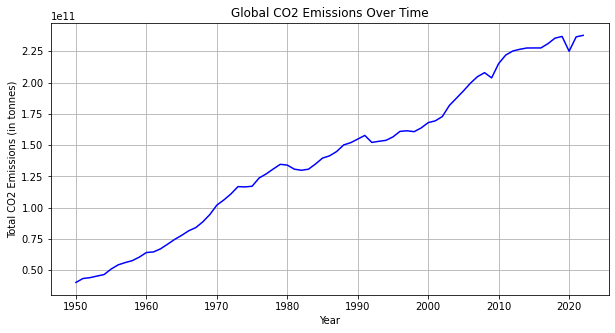

Anomalies Data:
+----+-----+-----+
|Year|Month|Value|
+----+-----+-----+
|1850|    1|-0.46|
|1850|    2|-0.33|
|1850|    3|-0.29|
|1850|    4|-0.31|
|1850|    5| -0.3|
+----+-----+-----+
only showing top 5 rows

Descriptive statistics for Anomalies dataset:
+-------+------------------+------------------+--------------------+
|summary|              Year|             Month|               Value|
+-------+------------------+------------------+--------------------+
|  count|              2090|              2090|                2090|
|   mean|1936.5837320574162|6.4952153110047846|0.047086124401913766|
| stddev| 50.28948199642381|3.4547233644252406| 0.36985380943433716|
|    min|              1850|                 1|               -0.67|
|    max|              2024|                12|                1.34|
+-------+------------------+------------------+--------------------+

Data types for Anomalies dataset:
root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- V

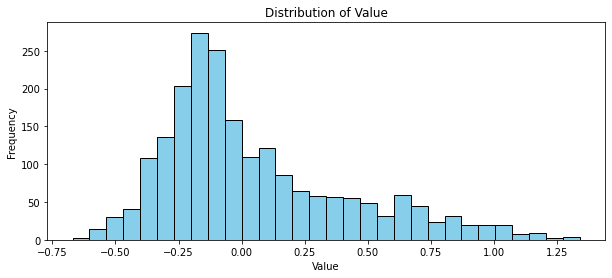


February 2024 Data:
+--------+---------+-------+
|Latitude|Longitude|Anomaly|
+--------+---------+-------+
|   -87.5|      2.5|  -1.38|
|   -87.5|      7.5|  -0.26|
|   -87.5|     12.5|  -1.44|
|   -87.5|     17.5|  -0.68|
|   -87.5|     22.5|  -1.33|
+--------+---------+-------+
only showing top 5 rows



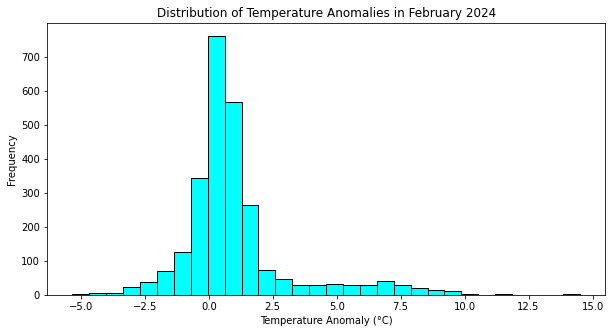

Duplicate entries in emissions dataset: 0
Duplicate entries in anomalies dataset: 0
Duplicate geographic entries in temperature dataset: 0


In [2]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("ExcelAndCSVReader") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Read the Excel file
excel_data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('annual-co2-emissions-per-country_cleaned.xlsx')

# Display the first few rows to verify the data is loaded
print("Excel Data:")
excel_data.show(5)

# Load the first CSV file
csv_data1 = spark.read.csv('Anomalies.csv', header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("Anomalies Data:")
csv_data1.show(5)

# Load the second CSV file
csv_data2 = spark.read.csv('February 2024.csv', header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("\nFebruary 2024 Data:")
csv_data2.show(5)

# Stop the Spark session
spark.stop()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder \
    .appName("ExcelDataExplorer") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Specify the path to the Excel file
file_path = 'annual-co2-emissions-per-country_cleaned.xlsx'

# Read the Excel file
data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)

# Display the first few rows to verify the data is loaded
print("First few rows of the dataset:")
data.show(5)

# Count unique entities
num_entities = data.select('Entity').distinct().count()
print(f"There are {num_entities} unique entities in the dataset.")

# Display descriptive statistics for the dataset
print("Descriptive statistics for the dataset:")
data.describe().show()

# Stop the Spark session
spark.stop()

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("CSVDataExplorer") \
    .getOrCreate()

# Load the first CSV file
file_path1 = 'Anomalies.csv'
data1 = spark.read.csv(file_path1, header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("Anomalies Data:")
data1.show(5)

# Print the descriptive statistics for the dataset
print("Descriptive statistics for Anomalies dataset:")
data1.describe().show()

# Print the data types and missing values of each column
print("Data types and missing values for Anomalies dataset:")
data1.printSchema()
data1.select([col(c).isNull().alias(c) for c in data1.columns]).groupBy().sum().show()

# Load the second CSV file
file_path2 = 'February 2024.csv'
data2 = spark.read.csv(file_path2, header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("\nFebruary 2024 Data:")
data2.show(5)

# Print the descriptive statistics for the dataset
print("Descriptive statistics for February 2024 dataset:")
data2.describe().show()

# Print the data types and missing values of each column
print("Data types and missing values for February 2024 dataset:")
data2.printSchema()
data2.select([col(c).isNull().alias(c) for c in data2.columns]).groupBy().sum().show()

# Stop the Spark session
spark.stop()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("DataVisualizations") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Load the Excel file
file_path = 'annual-co2-emissions-per-country_cleaned.xlsx'
data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)

# Group data by year and sum emissions
annual_emissions = data.groupBy('Year').agg(_sum('Auunal Emission').alias('Total Emission'))

# Convert to pandas DataFrame for plotting
annual_emissions_pd = annual_emissions.toPandas().sort_values('Year')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(annual_emissions_pd['Year'], annual_emissions_pd['Total Emission'], color='b')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (in tonnes)')
plt.grid(True)
plt.show()

spark.stop()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("AnomaliesDataVisualization") \
    .getOrCreate()

# Load the CSV file
file_path1 = 'Anomalies.csv'
data1 = spark.read.csv(file_path1, header=True, inferSchema=True)

# Show the first few rows to verify the data is loaded
print("Anomalies Data:")
data1.show(5)

# Print the descriptive statistics for the dataset
print("Descriptive statistics for Anomalies dataset:")
data1.describe().show()

# Print the data types and missing values of each column
print("Data types for Anomalies dataset:")
data1.printSchema()

# Check for missing values in each column
missing_values = data1.select([col(c).isNull().alias(c) for c in data1.columns]).groupBy().sum()
missing_values.show()

# Convert to pandas DataFrame for plotting
data1_pd = data1.toPandas()

# Plotting histograms for all numerical columns
numerical_columns = data1_pd.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(data1_pd[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

spark.stop()

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("DataVisualizations") \
    .getOrCreate()

# Load the CSV file
file_path2 = 'February 2024.csv'
data2 = spark.read.csv(file_path2, header=True, inferSchema=True)

# Show the first few rows to verify the data is loaded
print("\nFebruary 2024 Data:")
data2.show(5)

# Plotting histogram to show the distribution of temperature anomalies
data2_pd = data2.toPandas()

plt.figure(figsize=(10, 5))
plt.hist(data2_pd['Anomaly'], bins=30, color='cyan', edgecolor='black')
plt.title('Distribution of Temperature Anomalies in February 2024')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.show()

spark.stop()

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("DataVisualizations") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Load the datasets
file_path = 'annual-co2-emissions-per-country_cleaned.xlsx'
data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)

file_path1 = 'Anomalies.csv'
data1 = spark.read.csv(file_path1, header=True, inferSchema=True)

file_path2 = 'February 2024.csv'
data2 = spark.read.csv(file_path2, header=True, inferSchema=True)

# Check for duplicates in the emissions dataset
duplicate_emissions = data.groupBy('Entity', 'Year').count().filter(col('count') > 1).count()
print(f"Duplicate entries in emissions dataset: {duplicate_emissions}")

# Check for duplicates in the anomalies dataset
duplicate_anomalies = data1.groupBy('Year', 'Month').count().filter(col('count') > 1).count()
print(f"Duplicate entries in anomalies dataset: {duplicate_anomalies}")

# Check for duplicate geographic coordinates in the temperature dataset
duplicate_temperatures = data2.groupBy('Latitude', 'Longitude').count().filter(col('count') > 1).count()
print(f"Duplicate geographic entries in temperature dataset: {duplicate_temperatures}")

spark.stop()


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnull, when, count

# Create a Spark session
spark = SparkSession.builder \
    .appName("DataProcessing") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Function to save DataFrame to CSV
def save_dataframe_to_csv(df, file_path):
    df.coalesce(1).write.csv(file_path, header=True, mode='overwrite')

### Step 2: Load and Clean the Excel Dataset

# Specify the path to the Excel file
file_path = 'annual-co2-emissions-per-country_cleaned.xlsx'

# Load the dataset
data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)

# Display the first few rows to verify the data is loaded
print("Annual CO2 Emissions Data Initial Look:")
data.show(5)

# Remove duplicate entries
data = data.dropDuplicates(['Entity', 'Year'])

# Check for missing values
print("Missing values before handling:")
data.select([count(when(isnull(c), c)).alias(c) for c in data.columns]).show()

# Fill missing emissions values with the median
if 'Auunal Emission' in data.columns:
    median_value = data.approxQuantile('Auunal Emission', [0.5], 0.25)[0]
    data = data.withColumn('Auunal Emission', when(isnull(col('Auunal Emission')), median_value).otherwise(col('Auunal Emission')))

# Check missing values after handling
print("Missing values after handling:")
data.select([count(when(isnull(c), c)).alias(c) for c in data.columns]).show()

# Check for any negative emissions values and set them to NaN
data = data.withColumn('Auunal Emission', when(col('Auunal Emission') >= 0, col('Auunal Emission')).otherwise(None))

# Re-check for missing values if negative values were removed
print("Updated missing values after removing negatives:")
data.select([count(when(isnull(c), c)).alias(c) for c in data.columns]).show()

# Save the cleaned dataset
save_dataframe_to_csv(data, 'Cleaned_annual_co2_emissions.csv')

### Step 3: Load and Clean the First CSV Dataset

# Specify the path to the CSV file
file_path1 = 'Anomalies.csv'

# Load the dataset
data1 = spark.read.csv(file_path1, header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("Anomalies Data Initial Look:")
data1.show(5)

# Remove duplicate entries
data1 = data1.dropDuplicates()

# Check for missing values
print("Missing values before handling:")
data1.select([count(when(isnull(c), c)).alias(c) for c in data1.columns]).show()

# Fill missing values with the median
for col_name in data1.columns:
    median_value = data1.approxQuantile(col_name, [0.5], 0.25)[0]
    data1 = data1.withColumn(col_name, when(isnull(col(col_name)), median_value).otherwise(col(col_name)))

# Check missing values after handling
print("Missing values after handling:")
data1.select([count(when(isnull(c), c)).alias(c) for c in data1.columns]).show()

# Save the cleaned dataset
save_dataframe_to_csv(data1, 'Cleaned_Anomalies.csv')

### Step 4: Load and Clean the Second CSV Dataset

# Specify the path to the CSV file
file_path2 = 'February 2024.csv'

# Load the dataset
data2 = spark.read.csv(file_path2, header=True, inferSchema=True)

# Initially checking for and displaying the number of invalid entries
invalid_lat_long = data2.filter((col('Latitude') < -90) | (col('Latitude') > 90) | 
                                (col('Longitude') < -180) | (col('Longitude') > 180)).count()
print(f"Initial count of invalid latitude or longitude entries: {invalid_lat_long}")

# Removing entries with invalid latitude or longitude
data2 = data2.filter((col('Latitude') >= -90) & (col('Latitude') <= 90) & 
                     (col('Longitude') >= -180) & (col('Longitude') <= 180))

# Rechecking for invalid entries after removal
invalid_lat_long_after = data2.filter((col('Latitude') < -90) | (col('Latitude') > 90) | 
                                      (col('Longitude') < -180) | (col('Longitude') > 180)).count()
print(f"Count of invalid latitude or longitude entries after cleanup: {invalid_lat_long_after}")

# Display the cleaned data
print("\nCleaned February 2024 Data:")
data2.show(5)

# Save the cleaned dataset
save_dataframe_to_csv(data2, 'Cleaned_February_2024.csv')

### Step 5: Verify the Cleaned Data

# Load the cleaned dataset
cleaned_file_path = 'Cleaned_February_2024.csv'
cleaned_data = spark.read.csv(cleaned_file_path, header=True, inferSchema=True)

# Display the first few rows of the cleaned data to verify it's loaded correctly
cleaned_data.show(5)

# Check for basic statistics to see if the data looks consistent
print("\nBasic Statistics:")
cleaned_data.describe().show()

# Stop the Spark session
spark.stop()




Annual CO2 Emissions Data Initial Look:
+-----------+------+---------------+
|     Entity|  Year|Auunal Emission|
+-----------+------+---------------+
|Afghanistan|1950.0|        84272.0|
|Afghanistan|1951.0|        91600.0|
|Afghanistan|1952.0|        91600.0|
|Afghanistan|1953.0|       106256.0|
|Afghanistan|1954.0|       106256.0|
+-----------+------+---------------+
only showing top 5 rows

Missing values before handling:
+------+----+---------------+
|Entity|Year|Auunal Emission|
+------+----+---------------+
|     0|   0|              0|
+------+----+---------------+

Missing values after handling:
+------+----+---------------+
|Entity|Year|Auunal Emission|
+------+----+---------------+
|     0|   0|              0|
+------+----+---------------+

Updated missing values after removing negatives:
+------+----+---------------+
|Entity|Year|Auunal Emission|
+------+----+---------------+
|     0|   0|              0|
+------+----+---------------+

Anomalies Data Initial Look:
+----+--

Cleaned February 2024 Data Initial Look:
+--------+---------+-------+
|Latitude|Longitude|Anomaly|
+--------+---------+-------+
|   -87.5|      2.5|  -1.38|
|   -87.5|      7.5|  -0.26|
|   -87.5|     12.5|  -1.44|
|   -87.5|     17.5|  -0.68|
|   -87.5|     22.5|  -1.33|
+--------+---------+-------+
only showing top 5 rows


Data with New Features:
+--------+---------+-------+-------------------+-------------------+
|Latitude|Longitude|Anomaly|     Temp_Deviation|         Zonal_Mean|
+--------+---------+-------+-------------------+-------------------+
|   -87.5|      2.5|  -1.38|-2.3109876543209866|-0.7522222222222222|
|   -87.5|      7.5|  -0.26| -1.190987654320987|-0.7522222222222222|
|   -87.5|     12.5|  -1.44| -2.370987654320987|-0.7522222222222222|
|   -87.5|     17.5|  -0.68| -1.610987654320987|-0.7522222222222222|
|   -87.5|     22.5|  -1.33| -2.260987654320987|-0.7522222222222222|
+--------+---------+-------+-------------------+-------------------+
only showing top 5 rows

Da

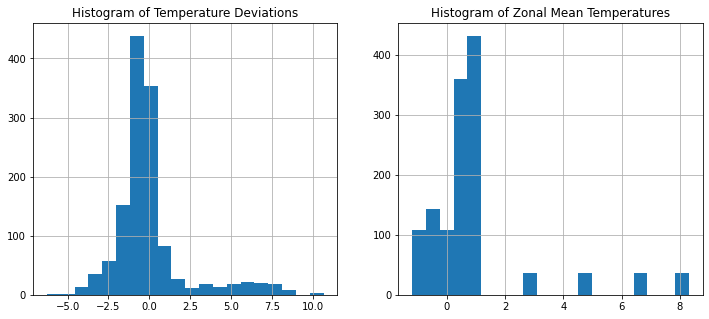

Anomalies Data Initial Look:
+----+-----+-----+
|Year|Month|Value|
+----+-----+-----+
|1850|    1|-0.46|
|1850|    2|-0.33|
|1850|    3|-0.29|
|1850|    4|-0.31|
|1850|    5| -0.3|
+----+-----+-----+
only showing top 5 rows


Data with New Features:
+----+-----+-----+------------------+-------------------+
|Year|Month|Value|Cumulative_Anomaly|        Monthly_Avg|
+----+-----+-----+------------------+-------------------+
|1850|    1|-0.46|             -0.46|0.04862857142857142|
|1851|    1|-0.17|             -0.17|0.04862857142857142|
|1852|    1|-0.02|             -0.02|0.04862857142857142|
|1853|    1|-0.12|             -0.12|0.04862857142857142|
|1854|    1|-0.28|             -0.28|0.04862857142857142|
+----+-----+-----+------------------+-------------------+
only showing top 5 rows

Data with constructed features saved to Constructed_Anomalies.csv
Constructed Anomalies Data Initial Look:
+----+-----+-----+------------------+-------------------+
|Year|Month|Value|Cumulative_Anomaly| 

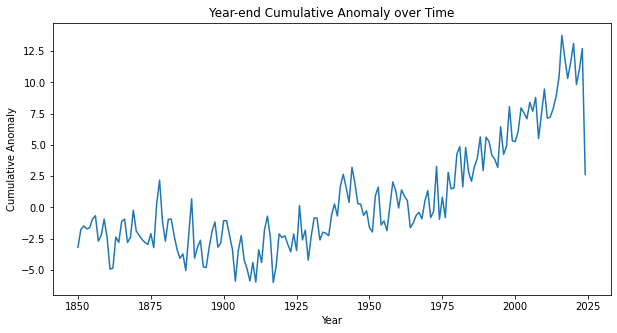

+-----------+------+---------------+-------------------+-----------------------+
|     Entity|  Year|Auunal Emission|Emission_Change_YoY|Emission_5yr_Moving_Avg|
+-----------+------+---------------+-------------------+-----------------------+
|Afghanistan|1950.0|        84272.0|               null|                84272.0|
|Afghanistan|1951.0|        91600.0|  8.695652173913043|                87936.0|
|Afghanistan|1952.0|        91600.0|                0.0|      89157.33333333333|
|Afghanistan|1953.0|       106256.0|               16.0|                93432.0|
|Afghanistan|1954.0|       106256.0|                0.0|                95996.8|
+-----------+------+---------------+-------------------+-----------------------+
only showing top 5 rows

None
Data with constructed features saved to Constructed_Annual_CO2_Emissions.xlsx


In [4]:
3.3
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean as _mean, lag, avg
from pyspark.sql.window import Window

# Create a Spark session
spark = SparkSession.builder \
    .appName("NewFeatures") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()
from pyspark.sql.functions import expr

# Load the cleaned dataset
file_path = 'Cleaned_February_2024.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("Cleaned February 2024 Data Initial Look:")
data.show(5)

# Calculate the mean temperature for the dataset
mean_temperature = data.select(_mean(col('Anomaly'))).collect()[0][0]

# Adding a 'Temp_Deviation' column that shows the deviation of each temperature from the mean
data = data.withColumn('Temp_Deviation', col('Anomaly') - mean_temperature)

# Compute zonal means for temperatures grouped by latitude
window_spec = Window.partitionBy('Latitude')
data = data.withColumn('Zonal_Mean', avg(col('Anomaly')).over(window_spec))

# Display the updated dataset with new features
print("\nData with New Features:")
data.show(5)

# Save the modified data to a new file
constructed_file_path = 'Constructed_February_2024_Temperatures.csv'
data.coalesce(1).write.csv(constructed_file_path, header=True, mode='overwrite')

print(f"Data with constructed features saved to {constructed_file_path}")

# Verify the saved data
constructed_data = spark.read.csv(constructed_file_path, header=True, inferSchema=True)
print("Constructed February 2024 Data Initial Look:")
constructed_data.show(5)

# Summary statistics for new features
print("\nSummary Statistics for New Features:")
constructed_data.select('Temp_Deviation', 'Zonal_Mean').describe().show()

# Check for null values in the new features
print("\nNull Values Check in Constructed Features:")
constructed_data.select([count(when(isnull(c), c)).alias(c) for c in ['Temp_Deviation', 'Zonal_Mean']]).show()

import matplotlib.pyplot as plt

# Plotting histograms for new features
constructed_data_pd = constructed_data.toPandas()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
constructed_data_pd['Temp_Deviation'].hist(bins=20)
plt.title('Histogram of Temperature Deviations')

plt.subplot(1, 2, 2)
constructed_data_pd['Zonal_Mean'].hist(bins=20)
plt.title('Histogram of Zonal Mean Temperatures')
plt.show()
# Load the dataset
file_path1 = 'Anomalies.csv'
data1 = spark.read.csv(file_path1, header=True, inferSchema=True)

# Display the first few rows to verify the data is loaded
print("Anomalies Data Initial Look:")
data1.show(5)

# Calculate cumulative anomaly
window_spec = Window.partitionBy('Year').orderBy('Month')
data1 = data1.withColumn('Cumulative_Anomaly', expr('sum(Value) over (partition by Year order by Month)'))

# Calculate monthly averages
window_spec = Window.partitionBy('Month')
data1 = data1.withColumn('Monthly_Avg', avg(col('Value')).over(window_spec))

# Display the updated dataset with new features
print("\nData with New Features:")
data1.show(5)

# Save the modified data to a new file
constructed_file_path1 = 'Constructed_Anomalies.csv'
data1.coalesce(1).write.csv(constructed_file_path1, header=True, mode='overwrite')

print(f"Data with constructed features saved to {constructed_file_path1}")

# Verify the saved data
constructed_data = spark.read.csv(constructed_file_path1, header=True, inferSchema=True)
print("Constructed Anomalies Data Initial Look:")
constructed_data.show(5)

# Check for continuity and correctness of 'Cumulative_Anomaly'
print("\nYear-end Cumulative Anomalies:")
constructed_data.groupBy('Year').agg(expr('max(Cumulative_Anomaly)').alias('Year-end Cumulative Anomaly')).show()

# Check that the 'Monthly_Avg' makes sense by comparing different years
print("\nSample Monthly Averages for January across Years:")
constructed_data.filter(col('Month') == 1).select('Monthly_Avg').distinct().show()

# Summary statistics for new features
print("\nSummary Statistics for New Features:")
constructed_data.select('Cumulative_Anomaly', 'Monthly_Avg').describe().show()

import matplotlib.pyplot as plt

# Plotting cumulative anomalies over the years
constructed_data_pd = constructed_data.toPandas()
plt.figure(figsize=(10, 5))
constructed_data_pd.groupby('Year')['Cumulative_Anomaly'].last().plot(kind='line')
plt.title('Year-end Cumulative Anomaly over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Anomaly')
plt.show()
# Load the dataset
file_path = 'annual-co2-emissions-per-country_cleaned.xlsx'
data = spark.read \
    .format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)

# Sort data to ensure proper year sequence by country
data = data.orderBy('Entity', 'Year')

# Calculate the year-on-year percentage change in emissions
window_spec = Window.partitionBy('Entity').orderBy('Year')
data = data.withColumn('Emission_Change_YoY', (col('Auunal Emission') - lag(col('Auunal Emission')).over(window_spec)) / lag(col('Auunal Emission')).over(window_spec) * 100)

# Calculate a 5-year moving average of emissions
data = data.withColumn('Emission_5yr_Moving_Avg', avg(col('Auunal Emission')).over(window_spec.rowsBetween(-4, 0)))

# Display the first few rows to verify new features
print(data.select('Entity', 'Year', 'Auunal Emission', 'Emission_Change_YoY', 'Emission_5yr_Moving_Avg').show(5))

# Save the modified data
constructed_file_path = 'Constructed_Annual_CO2_Emissions.xlsx'
data.coalesce(1).write.format('com.databricks.spark.csv').option('header', 'true').save(constructed_file_path, mode='overwrite')

print(f"Data with constructed features saved to {constructed_file_path}")


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnull
import os

# Create a Spark session
spark = SparkSession.builder \
    .appName("MergeDatasets") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.5") \
    .getOrCreate()

# Define the directory path
directory_path = 'Constructed_Annual_CO2_Emissions.xlsx'

# Verify if the path is a directory and list contents
if os.path.isdir(directory_path):
    print(f"The path {directory_path} is a directory. Listing contents:")
    for file_name in os.listdir(directory_path):
        print(file_name)
else:
    print(f"The path {directory_path} is not a directory. Please check the path.")

# Assuming the correct file is found in the directory, update the file path
file_path = os.path.join(directory_path, 'part-00000-1592ac19-4f26-49a5-9a2e-ef670bb1be21-c000.csv')  # Replace with actual file name if different

# Check if the updated file path exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    try:
        # Load the CO2 emissions dataset
        co2_data = spark.read.csv(file_path, header=True, inferSchema=True)
        
        # Verify the CO2 emissions dataset
        print("CO2 Emissions Data Initial Look:")
        co2_data.show(5)

        # Proceed only if co2_data is loaded successfully
        # Load the Anomalies dataset
        anomalies_data_path = 'Constructed_Anomalies.csv'
        anomalies_data = spark.read.csv(anomalies_data_path, header=True, inferSchema=True)

        # Verify the Anomalies dataset
        print("Anomalies Data Initial Look:")
        anomalies_data.show(5)

        # Ensure 'Year' is an integer in both datasets
        anomalies_data = anomalies_data.withColumn('Year', col('Year').cast('integer'))
        co2_data = co2_data.withColumn('Year', col('Year').cast('integer'))

        # Merge the datasets on 'Year'
        combined_data = anomalies_data.join(co2_data, on='Year', how='outer')

        # Display the first few rows to verify the merge
        print("Combined Data Initial Look:")
        combined_data.show(5)

        # Check for missing values in each column
        print("Missing values in each column:")
        combined_data.select([count(when(isnull(c), c)).alias(c) for c in combined_data.columns]).show()

        # Summary statistics for the combined data
        print("Summary statistics for combined data:")
        combined_data.describe().show()

        # Save the integrated dataset
        combined_file_path = 'Integrated_Anomalies_and_CO2_Data.csv'
        combined_data.coalesce(1).write.csv(combined_file_path, header=True, mode='overwrite')

        print(f"Integrated data saved to {combined_file_path}")

    except Exception as e:
        print(f"An error occurred while loading the CSV file: {e}")

# Stop the Spark session
spark.stop()


The path Constructed_Annual_CO2_Emissions.xlsx is a directory. Listing contents:
part-00000-b500cf20-5129-4350-99f1-7ec21f18b07e-c000.csv
.part-00000-b500cf20-5129-4350-99f1-7ec21f18b07e-c000.csv.crc
_SUCCESS
._SUCCESS.crc
File not found: Constructed_Annual_CO2_Emissions.xlsx/part-00000-1592ac19-4f26-49a5-9a2e-ef670bb1be21-c000.csv


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, mean

# Create a Spark session
spark = SparkSession.builder \
    .appName("ReformatData") \
    .getOrCreate()

# Load the integrated dataset
file_path = 'Integrated_Anomalies_and_CO2_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the first few rows and the dataset info
print("Initial Data:")
data.show(5)
data.printSchema()

# Filter the dataset to include only records from 1950 onwards
data = data.filter(col('Year') >= 1950)

# Check the filtered data
print("Filtered Data (from 1950 onwards):")
data.show(5)

# Check for missing values
print("Missing values in each column:")
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

# Handling missing values by filling with median values
median_auunal_emission = data.approxQuantile('Auunal Emission', [0.5], 0.25)[0]
median_emission_change_yoy = data.approxQuantile('Emission_Change_YoY', [0.5], 0.25)[0]
median_emission_5yr_moving_avg = data.approxQuantile('Emission_5yr_Moving_Avg', [0.5], 0.25)[0]

data = data.fillna({
    'Auunal Emission': median_auunal_emission,
    'Emission_Change_YoY': median_emission_change_yoy,
    'Emission_5yr_Moving_Avg': median_emission_5yr_moving_avg
})

# Remove duplicates
initial_count = data.count()
data = data.dropDuplicates()
print(f"Removed {initial_count - data.count()} duplicates.")

# Validate data types and make any necessary adjustments
print("Data Types:")
data.printSchema()

# Save the cleaned dataset
cleaned_file_path = 'Cleaned_and_Filtered_Data.csv'
data.coalesce(1).write.csv(cleaned_file_path, header=True, mode='overwrite')

# Generate descriptive statistics
descriptive_stats = data.describe()
descriptive_stats.show()

# Calculate the total number of rows using .count()
total_rows = data.count()

# Display the total number of rows
print("Total number of rows in the dataset:", total_rows)

# Stop the Spark session
spark.stop()


Initial Data:
+----+-----+-----+-------------------+--------------------+------+---------------+-------------------+-----------------------+
|Year|Month|Value| Cumulative_Anomaly|         Monthly_Avg|Entity|Auunal Emission|Emission_Change_YoY|Emission_5yr_Moving_Avg|
+----+-----+-----+-------------------+--------------------+------+---------------+-------------------+-----------------------+
|1850|    1|-0.46|              -0.46| 0.04862857142857142|  null|           null|               null|                   null|
|1850|    2|-0.33|              -0.79| 0.04491428571428564|  null|           null|               null|                   null|
|1850|    3|-0.29|              -1.08| 0.04362068965517246|  null|           null|               null|                   null|
|1850|    4|-0.31|-1.3900000000000001| 0.04155172413793103|  null|           null|               null|                   null|
|1850|    5| -0.3|-1.6900000000000002|0.040977011494252855|  null|           null|               

+----+-----+-----+------------------+-----------+------+---------------+-------------------+-----------------------+
|Year|Month|Value|Cumulative_Anomaly|Monthly_Avg|Entity|Auunal Emission|Emission_Change_YoY|Emission_5yr_Moving_Avg|
+----+-----+-----+------------------+-----------+------+---------------+-------------------+-----------------------+
|   0|    0|    0|                 0|          0|    14|             14|               4502|                     14|
+----+-----+-----+------------------+-----------+------+---------------+-------------------+-----------------------+



Removed 0 duplicates.
Data Types:
root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Value: double (nullable = true)
 |-- Cumulative_Anomaly: double (nullable = true)
 |-- Monthly_Avg: double (nullable = true)
 |-- Entity: string (nullable = true)
 |-- Auunal Emission: double (nullable = false)
 |-- Emission_Change_YoY: double (nullable = false)
 |-- Emission_5yr_Moving_Avg: double (nullable = false)



+-------+------------------+------------------+------------------+-------------------+--------------------+-----------+-------------------+-------------------+-----------------------+
|summary|              Year|             Month|             Value| Cumulative_Anomaly|         Monthly_Avg|     Entity|    Auunal Emission|Emission_Change_YoY|Emission_5yr_Moving_Avg|
+-------+------------------+------------------+------------------+-------------------+--------------------+-----------+-------------------+-------------------+-----------------------+
|  count|            205130|            205130|            205130|             205130|              205130|     205116|             205130|             205130|                 205130|
|   mean|1986.8043874616096| 6.499951250426559|0.3495899185881796|  2.286109150294987|0.047086422763506955|       null|6.013556336866823E8|  7.164458935397469|    5.787560536663274E8|
| stddev|20.931598920991252|3.4520797727328647|0.3429317959495372| 2.80973346606

Total number of rows in the dataset: 205130


In [7]:
4.1
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, floor, avg

# Create a Spark session
spark = SparkSession.builder \
    .appName("AggregateData") \
    .getOrCreate()

# Load the dataset
file_path = 'Cleaned_and_Filtered_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Ensure 'Year' is in the correct format
data = data.withColumn('Year', col('Year').cast('int'))

# Create a new column for the 5-year block
data = data.withColumn('Five_Year_Block', floor(col('Year') / 5) * 5)

# Aggregate data by 'Entity' and 'Five_Year_Block'
five_year_data = data.groupBy('Entity', 'Five_Year_Block').agg(
    *[avg(c).alias(c) for c in data.columns if c not in ['Entity', 'Five_Year_Block', 'Year']]
)

# Display the aggregated data to verify correctness
print("Aggregated Data:")
five_year_data.show(5)

# Save the aggregated data
aggregated_file_path = 'Entity_Specific_Five_Year_Aggregated_Data.csv'
five_year_data.coalesce(1).write.csv(aggregated_file_path, header=True, mode='overwrite')

# Stop the Spark session
spark.stop()


Aggregated Data:


+--------------------+---------------+-----+--------------------+------------------+--------------------+---------------+--------------------+-----------------------+
|              Entity|Five_Year_Block|Month|               Value|Cumulative_Anomaly|         Monthly_Avg|Auunal Emission| Emission_Change_YoY|Emission_5yr_Moving_Avg|
+--------------------+---------------+-----+--------------------+------------------+--------------------+---------------+--------------------+-----------------------+
|       Cote d'Ivoire|           1955|  6.5|0.008833333333333334|0.1328333333333334|0.047086425834701684|       545203.4|   2.199390222026754|      518833.5600000001|
|               Spain|           1980|  6.5|  0.3063333333333334| 2.086666666666667|0.047086425834701684|     2.059418E8|-0.44860788054505274|           2.04848374E8|
|             Romania|           1980|  6.5|  0.3063333333333334|2.0866666666666664|0.047086425834701684|   1.95197852E8|  -0.688294078689972|           1.93262504E8

Initial Data:
+--------------------+---------------+-----+--------------------+------------------+--------------------+---------------+--------------------+-----------------------+
|              Entity|Five_Year_Block|Month|               Value|Cumulative_Anomaly|         Monthly_Avg|Auunal Emission| Emission_Change_YoY|Emission_5yr_Moving_Avg|
+--------------------+---------------+-----+--------------------+------------------+--------------------+---------------+--------------------+-----------------------+
|       Cote d'Ivoire|           1955|  6.5|0.008833333333333334|0.1328333333333334|0.047086425834701684|       545203.4|   2.199390222026754|      518833.5600000001|
|               Spain|           1980|  6.5|  0.3063333333333334| 2.086666666666667|0.047086425834701684|     2.059418E8|-0.44860788054505274|           2.04848374E8|
|             Romania|           1980|  6.5|  0.3063333333333334|2.0866666666666664|0.047086425834701684|   1.95197852E8|  -0.688294078689972|         

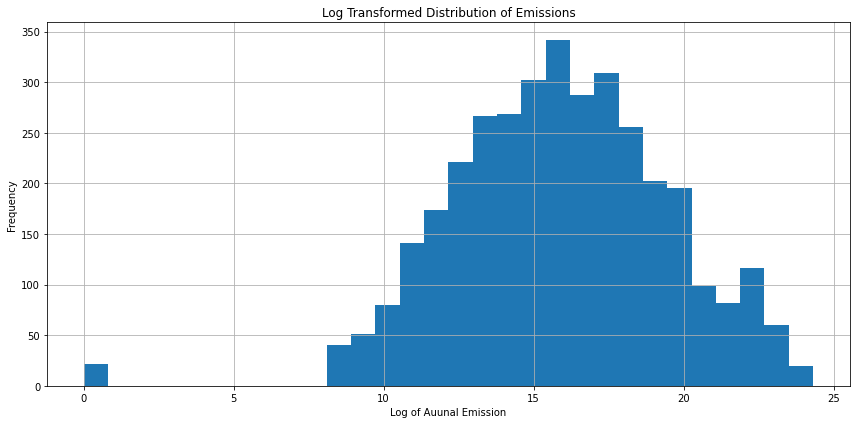

Transformed data saved successfully.


In [8]:
4.2
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, log1p, skewness
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("ProjectData") \
    .getOrCreate()

# Load the dataset
file_path = 'Entity_Specific_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the first few rows to ensure correct loading
print("Initial Data:")
data.show(5)

# Check skewness for an example column 'Auunal Emission' before transformation
initial_skewness = data.select(skewness(col('Auunal Emission'))).collect()[0][0]
print("Skewness before transformation:", initial_skewness)

# Apply a logarithmic transformation, adding 1 to avoid log(0)
data = data.withColumn('Auunal Emission', log1p(col('Auunal Emission')))

# Check skewness after transformation
transformed_skewness = data.select(skewness(col('Auunal Emission'))).collect()[0][0]
print("Skewness after transformation:", transformed_skewness)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
data_pd = data.toPandas()

# Plotting the distribution after log transformation
plt.figure(figsize=(12, 6))
data_pd['Auunal Emission'].hist(bins=30)
plt.title('Log Transformed Distribution of Emissions')
plt.xlabel('Log of Auunal Emission')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Save the transformed dataset
transformed_file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data.coalesce(1).write.csv(transformed_file_path, header=True, mode='overwrite')

print("Transformed data saved successfully.")

# Stop the Spark session
spark.stop()


root
 |-- Entity: string (nullable = true)
 |-- Five_Year_Block: integer (nullable = true)
 |-- Month: double (nullable = true)
 |-- Value: double (nullable = true)
 |-- Cumulative_Anomaly: double (nullable = true)
 |-- Monthly_Avg: double (nullable = true)
 |-- Auunal Emission: double (nullable = true)
 |-- Emission_Change_YoY: double (nullable = true)
 |-- Emission_5yr_Moving_Avg: double (nullable = true)



/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubun

                               SARIMAX Results                                
Dep. Variable:        Auunal Emission   No. Observations:                 3535
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9535.963
Date:                Thu, 23 May 2024   AIC                          19077.926
Time:                        03:38:42   BIC                          19096.437
Sample:                             0   HQIC                         19084.529
                               - 3535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0112      0.017      0.648      0.517      -0.023       0.045
ma.L1         -1.0000      0.013    -78.497      0.000      -1.025      -0.975
sigma2        12.8913      0.273     47.281      0.0

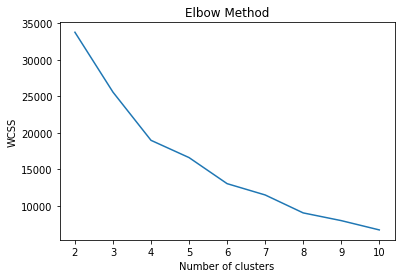

+------------------+------------------+----------+
|   Auunal Emission|Cumulative_Anomaly|prediction|
+------------------+------------------+----------+
|13.208916049204818|0.1328333333333334|         1|
| 19.14310416742025| 2.086666666666667|         0|
| 19.08952423290737|2.0866666666666664|         0|
| 13.77699091100665| 2.086666666666667|         1|
|16.138437427005336| 1.976333333333333|         2|
+------------------+------------------+----------+
only showing top 5 rows



In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create a Spark session
spark = SparkSession.builder \
    .appName("ARIMA_Modeling") \
    .getOrCreate()

# Load time series data
file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the columns of the dataset
data.printSchema()

# Ensure 'Five_Year_Block' is in the correct format
data = data.withColumn('Five_Year_Block', col('Five_Year_Block').cast('int'))

# Convert to Pandas DataFrame for ARIMA modeling
data_pd = data.toPandas()

# Assuming 'Five_Year_Block' is the index and 'Auunal Emission' is the time series column you want to model
data_pd['Five_Year_Block'] = pd.to_datetime(data_pd['Five_Year_Block'], format='%Y')
data_pd.set_index('Five_Year_Block', inplace=True)

# Example parameter settings after exploratory analysis
model = ARIMA(data_pd['Auunal Emission'], order=(1, 1, 1))  # These parameters should be refined based on your data
fitted_model = model.fit()

# Print summary of the model to review performance and diagnostics
print(fitted_model.summary())

# Stop the Spark session
spark.stop()
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("KMeans_Clustering") \
    .getOrCreate()

# Load dataset
file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the columns of the dataset to verify
data.printSchema()

# Assemble features into a feature vector
assembler = VectorAssembler(
    inputCols=['Auunal Emission', 'Cumulative_Anomaly'],
    outputCol='features'
)
data = assembler.transform(data)

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(2, 11):  
    kmeans = KMeans().setK(i).setSeed(1)
    model = kmeans.fit(data.select('features'))
    wcss.append(model.summary.trainingCost)

# Plot the elbow curve
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans().setK(3).setSeed(1)  # Adjust the number of clusters based on the elbow curve
model = kmeans.fit(data.select('features'))
data = model.transform(data)

# Check the resulting clusters
data.select('Auunal Emission', 'Cumulative_Anomaly', 'prediction').show(5)

# Convert to Pandas DataFrame if needed for further analysis or visualization
data_pd = data.select('Auunal Emission', 'Cumulative_Anomaly', 'prediction').toPandas()

# Stop the Spark session
spark.stop()


In [10]:
7.2
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create a Spark session
spark = SparkSession.builder \
    .appName("ARIMA_Modeling") \
    .getOrCreate()

# Load the dataset
file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Ensure 'Five_Year_Block' is in the correct format
data = data.withColumn('Five_Year_Block', col('Five_Year_Block').cast('int'))

# Convert to Pandas DataFrame for ARIMA modeling
data_pd = data.toPandas()

# Assuming 'Five_Year_Block' is the index and 'Auunal Emission' is the time series column you want to model
data_pd['Five_Year_Block'] = pd.to_datetime(data_pd['Five_Year_Block'], format='%Y')
data_pd.set_index('Five_Year_Block', inplace=True)
data_pd.index = pd.DatetimeIndex(data_pd.index).to_period('Y')  # Ensure yearly frequency

# Fit the ARIMA model
model = ARIMA(data_pd['Auunal Emission'], order=(1, 1, 1))
fitted_model = model.fit()

# Forecast future points and handle index correctly
forecast = fitted_model.forecast(steps=5)
print("Forecasted Emissions:", forecast)

# Stop the Spark session
spark.stop()


/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ubuntu/.local/lib/python3.10/site-packages/

Forecasted Emissions: 3535    15.901356
3536    15.879999
3537    15.879759
3538    15.879757
3539    15.879757
Name: predicted_mean, dtype: float64


/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

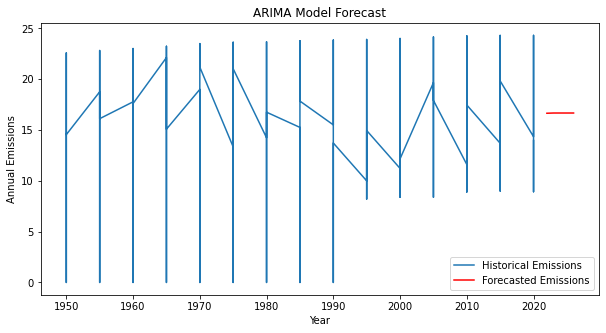

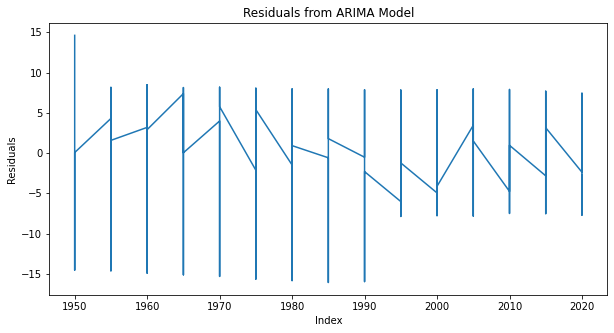

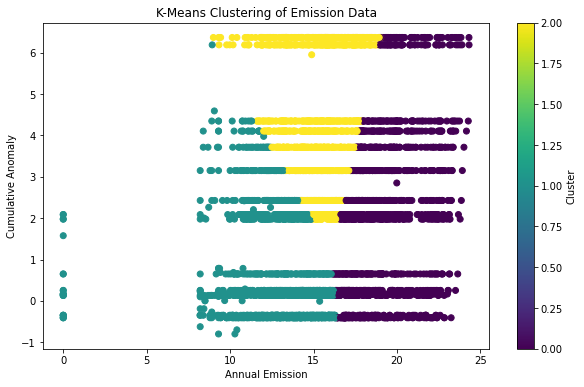

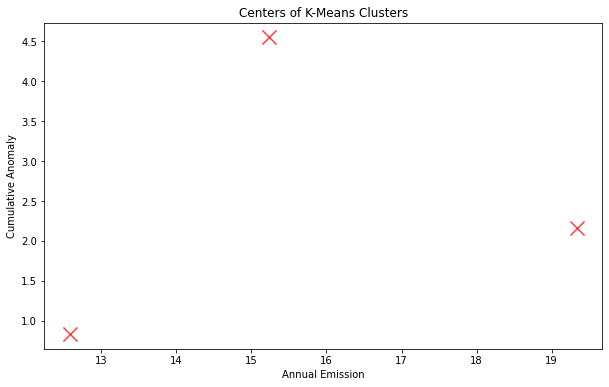

In [11]:
8
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("ARIMA_Modeling") \
    .getOrCreate()

# Load the dataset
file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Ensure 'Five_Year_Block' is in the correct format
data = data.withColumn('Five_Year_Block', col('Five_Year_Block').cast('int'))

# Convert to Pandas DataFrame for ARIMA modeling
data_pd = data.toPandas()

# Assuming 'Five_Year_Block' is the index and 'Auunal Emission' is the time series column you want to model
data_pd['Five_Year_Block'] = pd.to_datetime(data_pd['Five_Year_Block'], format='%Y')
data_pd.set_index('Five_Year_Block', inplace=True)
data_pd = data_pd.sort_index()

# Fit the ARIMA model
model = ARIMA(data_pd['Auunal Emission'], order=(1, 1, 1))
fitted_model = model.fit()

# Forecast future points
forecast = fitted_model.forecast(steps=5)
forecast_index = pd.date_range(start=data_pd.index.max(), periods=len(forecast) + 1, freq='A')[1:]

# Plot historical data and forecasts
plt.figure(figsize=(10, 5))
plt.plot(data_pd.index, data_pd['Auunal Emission'], label='Historical Emissions')
plt.plot(forecast_index, forecast, label='Forecasted Emissions', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Year')
plt.ylabel('Annual Emissions')
plt.legend()
plt.show()

# Plot residuals
residuals = fitted_model.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

# Stop the Spark session
spark.stop()

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("KMeans_Clustering") \
    .getOrCreate()

# Load dataset
file_path = 'Transformed_Five_Year_Aggregated_Data.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Assemble features into a feature vector
assembler = VectorAssembler(
    inputCols=['Auunal Emission', 'Cumulative_Anomaly'],
    outputCol='features'
)
data = assembler.transform(data)

# Create and fit the K-Means model
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(data.select('features'))
data = model.transform(data)

# Convert to Pandas DataFrame for plotting
data_pd = data.select('Auunal Emission', 'Cumulative_Anomaly', 'prediction').toPandas()

# Plot the clustering scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_pd['Auunal Emission'], data_pd['Cumulative_Anomaly'], c=data_pd['prediction'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Annual Emission')
plt.ylabel('Cumulative Anomaly')
plt.title('K-Means Clustering of Emission Data')
plt.show()

# Plot cluster centers
centers = model.clusterCenters()
plt.figure(figsize=(10, 6))
plt.scatter([center[0] for center in centers], [center[1] for center in centers], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Annual Emission')
plt.ylabel('Cumulative Anomaly')
plt.title('Centers of K-Means Clusters')
plt.show()

# Stop the Spark session
spark.stop()
